In [168]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append("..")
from KMeans import MyKMeans
from sklearn.cluster import KMeans

from scipy.spatial import distance
from scipy import linalg

(22, 2)


<AxesSubplot:>

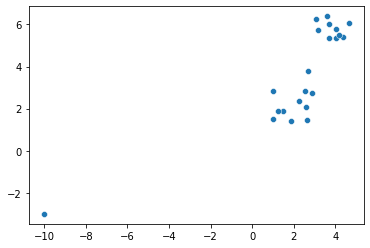

In [139]:
X = np.array([[2.7, 3.8], [-10, -3], [1.011912023516296, 1.5168927137365245], [1.4768066919949765, 1.8754986516362342], [2.642927166902791, 1.4562940293368125], [2.5167134689220223, 2.849968258665048], [2.240181553206663, 2.351547717099643], [1.854885951477039, 1.4181398385029436], [2.8683218751964823, 2.7406774558558125], [1.2196516709864358, 1.8706667633370344], [2.588948743983239, 2.0857729311504043], [1.0228060595545112, 2.8370028805016627], [3.0594857840379777, 6.249769356410191], [4.352088575764137, 5.398497609244089], [4.0434772464986874, 5.356281249931453], [4.153923999469697, 5.518232338796011], [3.7052999809994747, 5.3749119895658], [3.5850058576976997, 6.3890000400412115], [4.022855428829764, 5.79710406828867], [3.709147281766435, 6.016869663425296], [4.630218788223818, 6.047669295642667], [3.18227565221874, 5.72248662734559]])
print(X.shape)
sns.scatterplot(X[:,0], X[:, 1])

In [140]:
dist_pairs = distance.cdist(X, X, metric="sqeuclidean")
for d in dist_pairs:
    print(d)

[  0.         207.53         8.0622199    5.19990731   5.49621499
   0.93615426   2.30944702   6.38747558   1.15049651   5.91375791
   2.95090683   3.74034297   6.13059993   5.28459127   4.22694244
   5.06621737   3.49097583   7.48615658   5.73837115   5.93288934
   8.77776183   3.92854464]
[207.53         0.         141.6645262  155.48757895 179.70216382
 190.89024469 178.46110742 160.05828056 198.54908554 149.60397834
 184.34671679 155.57285605 256.10840209 276.51720858 267.0466895
 272.89384676 257.9743984  272.70570591 274.02951437 269.24465772
 295.90362147 249.85416434]
[  8.0622199  141.6645262    0.           0.34472527   2.6638826
   4.0415178    2.20529501   0.72035717   4.94390663   0.16831184
   2.81066952   1.74280953  26.59267962  26.22363597  23.93129203
  25.88295805  22.13865142  30.35824168  27.38598943  27.52487059
  33.62008028  22.39749845]
[5.19990731e+00 1.55487579e+02 3.44725271e-01 0.00000000e+00
 1.53556948e+00 2.03099712e+00 8.09363891e-01 3.52121010e-01
 2.6

In [141]:
print(X[0])
print(X[1])

[2.7 3.8]
[-10.  -3.]


In [142]:
gamma = 7
n = 22
W = np.exp(-gamma * dist_pairs)
for d in W:
    print(d)

[1.00000000e+00 0.00000000e+00 3.09283469e-25 1.55583181e-16
 1.95510067e-17 1.42571786e-03 9.53101869e-08 3.81664885e-20
 3.17994795e-04 1.05150901e-18 1.06920787e-09 4.25723698e-12
 2.30462337e-19 8.60039127e-17 1.41200280e-13 3.96632480e-16
 2.43904175e-11 1.74431357e-23 3.58921551e-18 9.19712910e-19
 2.06569076e-27 1.14020567e-12]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[3.09283469e-025 0.00000000e+000 1.00000000e+000 8.95393666e-002
 7.97321379e-009 5.17056320e-013 1.97591299e-007 6.45758277e-003
 9.33728067e-016 3.07837610e-001 2.85359385e-009 5.03213240e-006
 1.43424015e-081 1.89905365e-080 1.76767930e-073 2.06166927e-079
 4.97898656e-068 5.11778587e-093 5.55790814e-084 2.10234567e-084
 6.20715481e-103 8.13261311e-069]
[1.55583181e-16 0.00000000e+00 8.95393666e-02 1.00000000e+00
 2.14671577e-05 6.69335881e-07 3.46325202e-03 8.50218435e-02
 6.88485284e-09 6.29352124e-01 1.27483130e-04 3.65498386e-04
 1.64344556e-66 1.36545526e-63 1.37965529e-57 7.44542

In [143]:
print(dist_pairs[1])
print(W[1])

[207.53         0.         141.6645262  155.48757895 179.70216382
 190.89024469 178.46110742 160.05828056 198.54908554 149.60397834
 184.34671679 155.57285605 256.10840209 276.51720858 267.0466895
 272.89384676 257.9743984  272.70570591 274.02951437 269.24465772
 295.90362147 249.85416434]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [144]:
np.exp(-7.6*141)

0.0

In [145]:
degrees = W.sum(axis=1)
print(degrees.shape)
print(degrees)

(22,)
[1.00174381 1.         1.4038398  1.80789171 1.07518875 1.5075973
 1.39063482 1.12025205 1.43809891 1.95258043 1.36754912 1.00148174
 1.29110698 2.43573378 3.00204828 3.25160144 1.97487742 1.50523925
 2.5025273  1.94013969 1.11399416 1.29425968]


In [146]:
D = np.zeros((n,n))
for i in range(n):
    D[i][i] = degrees[i]
for d in D:
    print(d)

[1.00174381 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.        0.        1.4038398 0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.       ]
[0.         0.         0.         1.80789171 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
[0.         0.         0.         0.         1.07518875 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
[0.        0.        0.        0.        0.        1.507597

In [147]:
L = D-W
for d in L:
    print(L)

[[ 1.74380906e-003  0.00000000e+000 -3.09283469e-025 -1.55583181e-016
  -1.95510067e-017 -1.42571786e-003 -9.53101869e-008 -3.81664885e-020
  -3.17994795e-004 -1.05150901e-018 -1.06920787e-009 -4.25723698e-012
  -2.30462337e-019 -8.60039127e-017 -1.41200280e-013 -3.96632480e-016
  -2.43904175e-011 -1.74431357e-023 -3.58921551e-018 -9.19712910e-019
  -2.06569076e-027 -1.14020567e-012]
 [ 0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000]
 [-3.09283469e-025  0.00000000e+000  4.03839800e-001 -8.95393666e-002
  -7.97321379e-009 -5.17056320e-013 -1.97591299e-007 -6.45758277e-003
  -9.33728067e-016 -3.07837610e-001 -2.85359385e-009 -5.03213240e-006
  -1.43424015e-0

[[ 1.74380906e-003  0.00000000e+000 -3.09283469e-025 -1.55583181e-016
  -1.95510067e-017 -1.42571786e-003 -9.53101869e-008 -3.81664885e-020
  -3.17994795e-004 -1.05150901e-018 -1.06920787e-009 -4.25723698e-012
  -2.30462337e-019 -8.60039127e-017 -1.41200280e-013 -3.96632480e-016
  -2.43904175e-011 -1.74431357e-023 -3.58921551e-018 -9.19712910e-019
  -2.06569076e-027 -1.14020567e-012]
 [ 0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000]
 [-3.09283469e-025  0.00000000e+000  4.03839800e-001 -8.95393666e-002
  -7.97321379e-009 -5.17056320e-013 -1.97591299e-007 -6.45758277e-003
  -9.33728067e-016 -3.07837610e-001 -2.85359385e-009 -5.03213240e-006
  -1.43424015e-0

[[ 1.74380906e-003  0.00000000e+000 -3.09283469e-025 -1.55583181e-016
  -1.95510067e-017 -1.42571786e-003 -9.53101869e-008 -3.81664885e-020
  -3.17994795e-004 -1.05150901e-018 -1.06920787e-009 -4.25723698e-012
  -2.30462337e-019 -8.60039127e-017 -1.41200280e-013 -3.96632480e-016
  -2.43904175e-011 -1.74431357e-023 -3.58921551e-018 -9.19712910e-019
  -2.06569076e-027 -1.14020567e-012]
 [ 0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000]
 [-3.09283469e-025  0.00000000e+000  4.03839800e-001 -8.95393666e-002
  -7.97321379e-009 -5.17056320e-013 -1.97591299e-007 -6.45758277e-003
  -9.33728067e-016 -3.07837610e-001 -2.85359385e-009 -5.03213240e-006
  -1.43424015e-0

[[ 1.74380906e-003  0.00000000e+000 -3.09283469e-025 -1.55583181e-016
  -1.95510067e-017 -1.42571786e-003 -9.53101869e-008 -3.81664885e-020
  -3.17994795e-004 -1.05150901e-018 -1.06920787e-009 -4.25723698e-012
  -2.30462337e-019 -8.60039127e-017 -1.41200280e-013 -3.96632480e-016
  -2.43904175e-011 -1.74431357e-023 -3.58921551e-018 -9.19712910e-019
  -2.06569076e-027 -1.14020567e-012]
 [ 0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000]
 [-3.09283469e-025  0.00000000e+000  4.03839800e-001 -8.95393666e-002
  -7.97321379e-009 -5.17056320e-013 -1.97591299e-007 -6.45758277e-003
  -9.33728067e-016 -3.07837610e-001 -2.85359385e-009 -5.03213240e-006
  -1.43424015e-0

[[ 1.74380906e-003  0.00000000e+000 -3.09283469e-025 -1.55583181e-016
  -1.95510067e-017 -1.42571786e-003 -9.53101869e-008 -3.81664885e-020
  -3.17994795e-004 -1.05150901e-018 -1.06920787e-009 -4.25723698e-012
  -2.30462337e-019 -8.60039127e-017 -1.41200280e-013 -3.96632480e-016
  -2.43904175e-011 -1.74431357e-023 -3.58921551e-018 -9.19712910e-019
  -2.06569076e-027 -1.14020567e-012]
 [ 0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000]
 [-3.09283469e-025  0.00000000e+000  4.03839800e-001 -8.95393666e-002
  -7.97321379e-009 -5.17056320e-013 -1.97591299e-007 -6.45758277e-003
  -9.33728067e-016 -3.07837610e-001 -2.85359385e-009 -5.03213240e-006
  -1.43424015e-0

  -2.01801429e-007  2.94259684e-001]]
[[ 1.74380906e-003  0.00000000e+000 -3.09283469e-025 -1.55583181e-016
  -1.95510067e-017 -1.42571786e-003 -9.53101869e-008 -3.81664885e-020
  -3.17994795e-004 -1.05150901e-018 -1.06920787e-009 -4.25723698e-012
  -2.30462337e-019 -8.60039127e-017 -1.41200280e-013 -3.96632480e-016
  -2.43904175e-011 -1.74431357e-023 -3.58921551e-018 -9.19712910e-019
  -2.06569076e-027 -1.14020567e-012]
 [ 0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000]
 [-3.09283469e-025  0.00000000e+000  4.03839800e-001 -8.95393666e-002
  -7.97321379e-009 -5.17056320e-013 -1.97591299e-007 -6.45758277e-003
  -9.33728067e-016 -3.07837610e-001 -2.85359385e

  -2.01801429e-007  2.94259684e-001]]
[[ 1.74380906e-003  0.00000000e+000 -3.09283469e-025 -1.55583181e-016
  -1.95510067e-017 -1.42571786e-003 -9.53101869e-008 -3.81664885e-020
  -3.17994795e-004 -1.05150901e-018 -1.06920787e-009 -4.25723698e-012
  -2.30462337e-019 -8.60039127e-017 -1.41200280e-013 -3.96632480e-016
  -2.43904175e-011 -1.74431357e-023 -3.58921551e-018 -9.19712910e-019
  -2.06569076e-027 -1.14020567e-012]
 [ 0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000]
 [-3.09283469e-025  0.00000000e+000  4.03839800e-001 -8.95393666e-002
  -7.97321379e-009 -5.17056320e-013 -1.97591299e-007 -6.45758277e-003
  -9.33728067e-016 -3.07837610e-001 -2.85359385e

[[ 1.74380906e-003  0.00000000e+000 -3.09283469e-025 -1.55583181e-016
  -1.95510067e-017 -1.42571786e-003 -9.53101869e-008 -3.81664885e-020
  -3.17994795e-004 -1.05150901e-018 -1.06920787e-009 -4.25723698e-012
  -2.30462337e-019 -8.60039127e-017 -1.41200280e-013 -3.96632480e-016
  -2.43904175e-011 -1.74431357e-023 -3.58921551e-018 -9.19712910e-019
  -2.06569076e-027 -1.14020567e-012]
 [ 0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000]
 [-3.09283469e-025  0.00000000e+000  4.03839800e-001 -8.95393666e-002
  -7.97321379e-009 -5.17056320e-013 -1.97591299e-007 -6.45758277e-003
  -9.33728067e-016 -3.07837610e-001 -2.85359385e-009 -5.03213240e-006
  -1.43424015e-0

[[ 1.74380906e-003  0.00000000e+000 -3.09283469e-025 -1.55583181e-016
  -1.95510067e-017 -1.42571786e-003 -9.53101869e-008 -3.81664885e-020
  -3.17994795e-004 -1.05150901e-018 -1.06920787e-009 -4.25723698e-012
  -2.30462337e-019 -8.60039127e-017 -1.41200280e-013 -3.96632480e-016
  -2.43904175e-011 -1.74431357e-023 -3.58921551e-018 -9.19712910e-019
  -2.06569076e-027 -1.14020567e-012]
 [ 0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000]
 [-3.09283469e-025  0.00000000e+000  4.03839800e-001 -8.95393666e-002
  -7.97321379e-009 -5.17056320e-013 -1.97591299e-007 -6.45758277e-003
  -9.33728067e-016 -3.07837610e-001 -2.85359385e-009 -5.03213240e-006
  -1.43424015e-0

In [148]:
evals, evecs = linalg.eig(L, left=False, right=True)
evals = np.real(evals)
evecs = np.real(evecs)
print(evals)

[2.98663744e+00 2.33779833e+00 1.54193040e+00 1.74735458e+00
 8.73978069e-01 1.11405562e+00 1.04207752e+00 6.34912974e-01
 5.93095221e-01 4.60195368e-01 3.47902737e-01 1.94785182e-01
 1.46087367e-01 7.09256127e-02 7.67783058e-03 2.00275912e-03
 1.46302945e-03 1.70269764e-01 1.05236631e-01 2.53324330e-17
 4.90110451e-12 0.00000000e+00]


In [149]:
sort_idxs = np.argsort(evals)
evals = evals[sort_idxs]
evecs = evecs[:,sort_idxs]
print(evals)

[0.00000000e+00 2.53324330e-17 4.90110451e-12 1.46302945e-03
 2.00275912e-03 7.67783058e-03 7.09256127e-02 1.05236631e-01
 1.46087367e-01 1.70269764e-01 1.94785182e-01 3.47902737e-01
 4.60195368e-01 5.93095221e-01 6.34912974e-01 8.73978069e-01
 1.04207752e+00 1.11405562e+00 1.54193040e+00 1.74735458e+00
 2.33779833e+00 2.98663744e+00]


In [150]:
for ev in evecs:
    print(ev)

[ 0.00000000e+00  2.18222300e-01  2.08056681e-01  5.04789036e-01
 -8.03055961e-01  9.64192770e-02  8.43055764e-03 -4.42379687e-12
  6.00764425e-04  3.89146892e-11  3.31808631e-03  1.06478801e-11
  3.67880306e-12 -3.41003451e-06 -1.48751002e-04 -9.59088560e-04
  7.57597571e-12 -1.73922220e-11 -1.74573424e-07 -1.09391276e-12
  2.32580774e-12  3.53094027e-13]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 0.00000000e+00  2.18222300e-01  2.08056687e-01 -1.09700987e-02
  1.51924378e-01  3.85766804e-01 -8.29218839e-02  6.72204849e-15
  3.46183864e-01  6.00921513e-14 -2.17212529e-02  3.46396608e-17
 -3.53819450e-16 -7.65082137e-01  2.17950322e-02 -7.84680200e-04
  2.55436528e-16 -4.76796182e-16  1.55100249e-01  1.77807712e-18
 -2.56208462e-16  8.32861163e-17]
[ 0.00000000e+00  2.18222300e-01  2.08056687e-01 -1.02390957e-02
  1.51282732e-01  3.75434716e-01 -6.34120124e-02  4.33910696e-15
  1.78601743e-01  2.53660674e-14 -7.17272429e-03 -2.94187562e-16
  3.88715321e-16  5

In [151]:
for a in np.dot(L, evecs.T[10]):
    print(a)

0.0006463140454302943
0.0
-0.004230978192272704
-0.0013971404064896322
-0.0584120900572232
-0.06822919372547886
0.1006249801652738
0.009935879571467299
-0.08647776545624569
-0.0026753977017026287
0.11020041204447459
1.4979712852255344e-05
7.354895352636104e-14
-6.41929266530081e-14
-6.12167825939033e-14
-6.071061573341906e-14
-4.2201650003662636e-14
6.1690932080282426e-15
-5.008989310950301e-14
-2.0695631271772058e-14
7.924460872487184e-14
5.4961900860681615e-14


In [152]:
for a in evals[10]*evecs.T[10]:
    print(a)

0.0006463140454303485
0.0
-0.004230978192272845
-0.0013971404064898338
-0.05841209005722318
-0.06822919372547878
0.1006249801652738
0.009935879571467285
-0.0864777654562458
-0.0026753977017023923
0.11020041204447455
1.497971285225956e-05
7.349070488179306e-14
-6.458906363197311e-14
-6.119581925599947e-14
-6.050642980099452e-14
-4.193345069018854e-14
6.082812511369169e-15
-5.0189138684628274e-14
-2.0611948191362613e-14
7.925765122673852e-14
5.495992993150034e-14


In [153]:
subset = evecs[:,0:3]
print(subset)

[[ 0.          0.2182223   0.20805668]
 [ 1.          0.          0.        ]
 [ 0.          0.2182223   0.20805669]
 [ 0.          0.2182223   0.20805669]
 [ 0.          0.2182223   0.20805669]
 [ 0.          0.2182223   0.20805669]
 [ 0.          0.2182223   0.20805669]
 [ 0.          0.2182223   0.20805669]
 [ 0.          0.2182223   0.20805669]
 [ 0.          0.2182223   0.20805669]
 [ 0.          0.2182223   0.20805669]
 [ 0.          0.2182223   0.20805669]
 [ 0.          0.21821304 -0.22887476]
 [ 0.          0.21821304 -0.22887476]
 [ 0.          0.21821304 -0.22887476]
 [ 0.          0.21821304 -0.22887476]
 [ 0.          0.21821304 -0.22887476]
 [ 0.          0.21821304 -0.22887476]
 [ 0.          0.21821304 -0.22887476]
 [ 0.          0.21821304 -0.22887476]
 [ 0.          0.21821304 -0.22887476]
 [ 0.          0.21821304 -0.22887476]]


<AxesSubplot:>

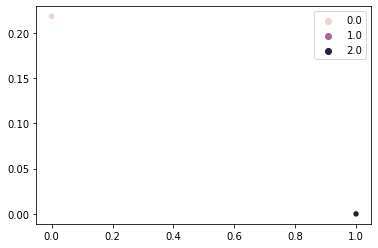

In [165]:
kmeans = MyKMeans()
kmeans.fit(subset, 3)
sns.scatterplot(subset[:,0], subset[:, 1], hue=kmeans.clusters)

In [166]:
labels = kmeans.clusters
print(labels)

[1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


<AxesSubplot:>

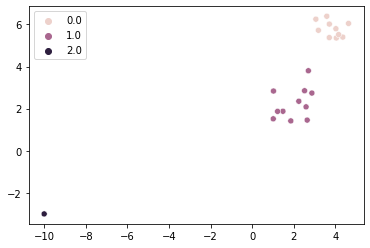

In [167]:
sns.scatterplot(X[:,0], X[:, 1], hue=labels)

In [170]:
labels2 = KMeans(n_clusters=3).fit_predict(evecs[:,0:3])
print(labels2)

[1 2 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]


<AxesSubplot:>

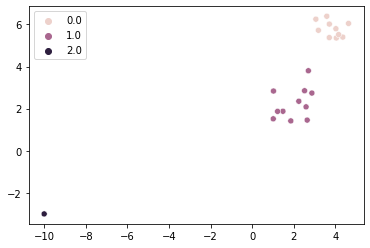

In [171]:
sns.scatterplot(X[:,0], X[:, 1], hue=labels)